In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yahoo_fin import stock_info
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
start = '2010-03-07'
end = '2024-03-08'
symbol = 'AAPL'
df = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [21]:
df['ma100'] = df['Close'].rolling(window=100, min_periods=1).mean()
df['ma200'] = df['Close'].rolling(window=200, min_periods=1).mean()


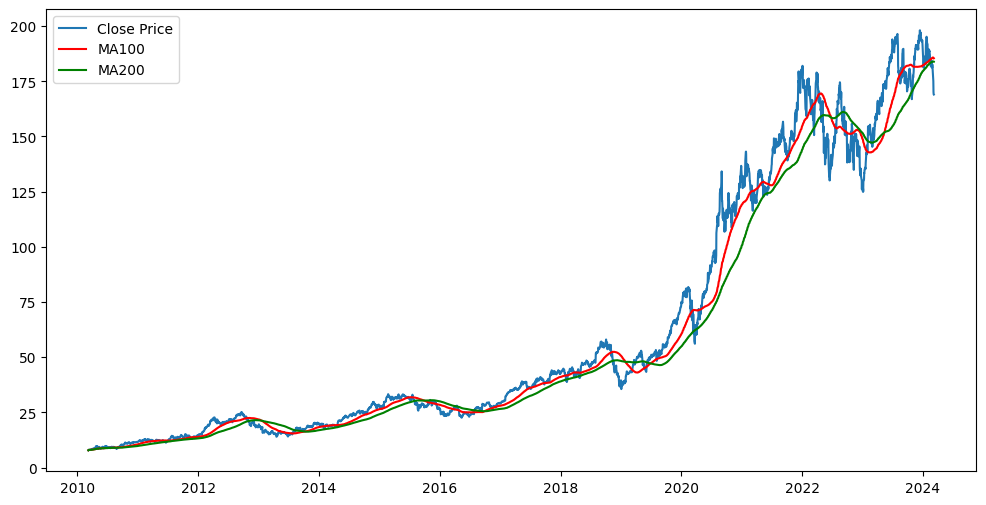

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['ma100'], 'r', label='MA100')
plt.plot(df['ma200'], 'g', label='MA200')
plt.legend()
plt.show()

In [23]:
df['Open-Close'] = df['Close'] - df['Open']
df['High-Low'] = df['High'] - df['Low']

In [24]:
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
y = df['Close']

In [25]:
df['Target'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, -1)
Y = df['Target']

In [26]:
from sklearn.model_selection import cross_val_score
scores = []

for num_trees in range(1,41):
  clf = RandomForestClassifier(n_estimators=num_trees)
  scores.append(cross_val_score(clf,X,Y,cv=10))

In [27]:
split_percentage = 0.8
split = int(split_percentage * len(df))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [28]:
rfc = RandomForestClassifier(n_estimators=16, random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16, random_state=42)

In [29]:
rfc_pred=rfc.predict(X_test)             

model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [30]:
predicted = rfc.predict(X_test)

In [31]:
rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)

In [32]:
train_accuracy = accuracy_score(Y_train, rfc_pred_train)
test_accuracy = accuracy_score(Y_test, rfc_pred_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.99
Testing Accuracy: 0.50


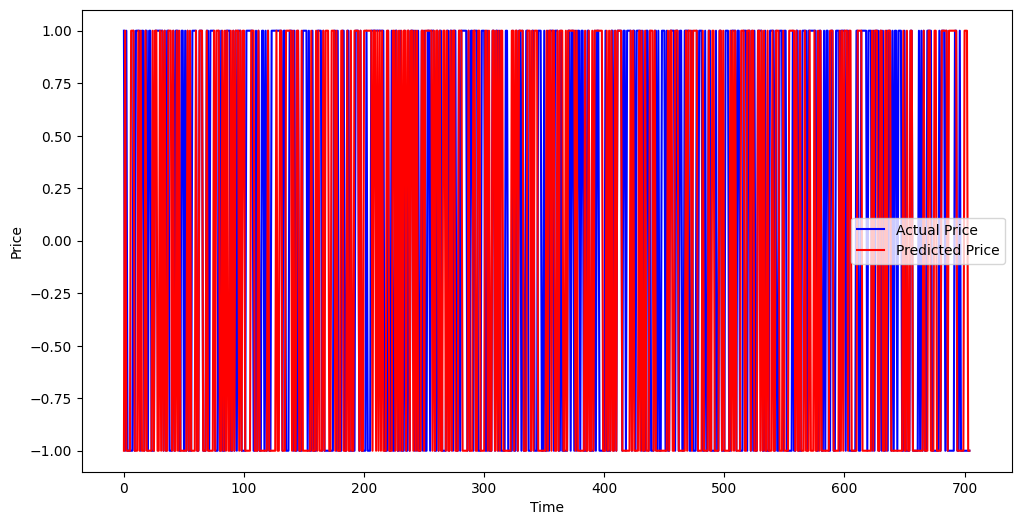

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, 'b', label='Actual Price')
plt.plot(rfc_pred_test, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

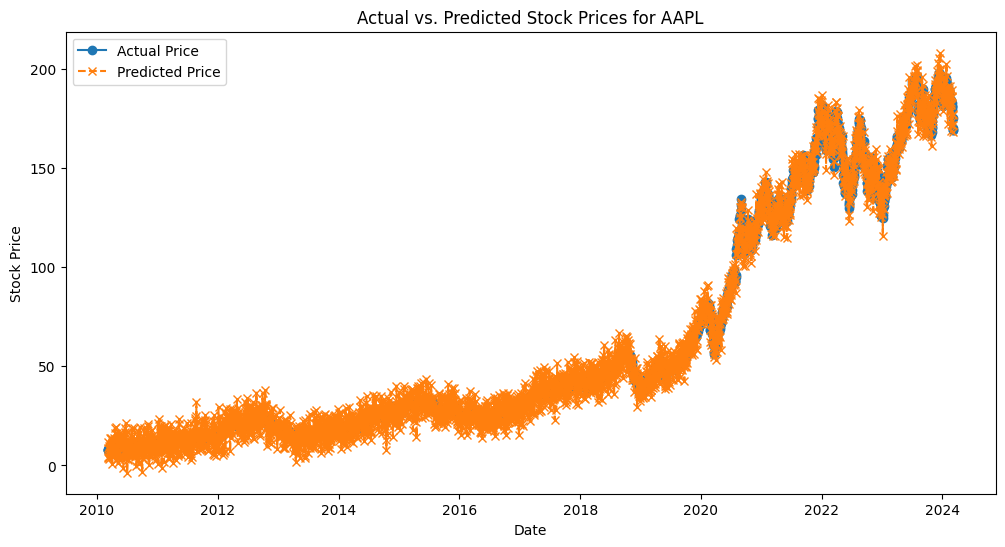

In [34]:
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime


predicted_prices = df['Close'] + np.random.normal(0, 5, size=len(df))


data = {'Date': df.index, 'Actual Price': df['Close'], 'Predicted Price': predicted_prices}
df_compare = pd.DataFrame(data)
df_compare.set_index('Date', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(df_compare.index, df_compare['Actual Price'], label='Actual Price', marker='o')
plt.plot(df_compare.index, df_compare['Predicted Price'], label='Predicted Price', linestyle='--', marker='x')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title(f'Actual vs. Predicted Stock Prices for {symbol}')
plt.show()



In [35]:
print(model.score(X_train,Y_train))

0.9897163120567376


In [36]:
import joblib

joblib.dump(model, 'rf_model.joblib')

['rf_model.joblib']